# Chapter 4: Training Models

# 1. Linear Regression

## 1.1 Normal Equation

To find the value of $\theta $ that minimizes the cost function, there is a closed-form solution (gives result directly). This is called the Normal Equation

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100,1)

We will now compute the $\hat{\theta}$ using the normal equation where $\hat{\theta} = (X^{T}X)^{-1}X^{T}y$

In [6]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.47695232],
       [3.00116975]])

Now making predictions using our best $\hat{\theta}$ parameter. $\hat{y} = \hat{\theta}*x$

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.47695232],
       [10.47929181]])

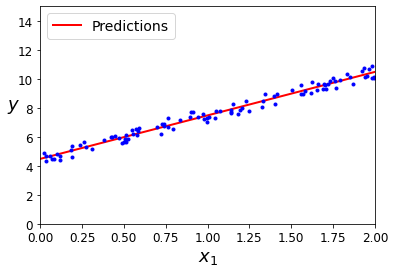

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() # pseudo inverse computed using SVD
lin_reg.fit(X ,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.47695232]), array([[3.00116975]]))

In [16]:
lin_reg.predict(X_new)

array([[ 4.47695232],
       [10.47929181]])

### 1.1.1 Psuedo Inverse

The LinearRegression class is based on the scipt.linalg.lstsq() function (least squares).

In [17]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.47695232],
       [3.00116975]])

This function computes the $\hat{\theta} = X^{+}y$ where $X^{+}$ is the pseudoinverse of X (Moore-Penrose inverse). The normal equation may not work if the matrix $X^{T}X$ is not invertible (due to m < n or some features redundant) but the pseudoinverse is always defined. The pseudoinverse is computed using singular value decomposition method where $X^{+} = V\sum^{T}U^{T}$. $\sum^{T}$ is computed by taking $\sum$ and all values smaller than a tiny threshold value to 0 then replaces all nonzero values with their inverse and finally transposes the resulting matrix.

### 1.1.2 Computational Complexity

$X^{T}X$ is a (n+1) x (n+1) matrix. Both the normal equation and SVD approach gets very slow when number of features grows large (eg: 100,000). Predictions are very fast since computational complexity is linear. In other words, making predictions on twice as many instances will take roughly twice as much time. As such, other methods of finding parameters such as Gradient Descent might be better.

## 1.2 Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions. The idea is to tweak parameters iteratively in order to minimize a cost function. It measures the local gradient of the error function with regard to parameter vector $\theta$ and it goes in the direction of desceding gradient until minimum

An important parameter in GD is the size of steps. This is determined by the learning rate hyperparameter.    
- Learning rate small --> algorithm have to go through many iterations to converge which can take long time.   
- Learning rate high --> might overshot the minimum and fail to find a good solution

The MSE cost function of Linear Regression is a convex function (if you pick any 2 points on the curve, the line segment joining them never crosses the curve). This implies that there are no local minimum and just one global minimum. Thus, GD is guaranteed to approach arbitrarily close to the global minimum

If features have very different scale, the cost function will have an elongated bowl shape. Hence, by scaling it, can reach minimum faster. (Since feature 1 is smaller, it takes a larger change in $\theta_{1}$ to affect the cost function hence the bowl is elongated along $\theta_{1}$ axis). Therefore, when using GD, we should ensure that all features have similar scale or else it will take much longer to converge.

## 1.3 Batch Gradient Descent

Uses entire training set to compute gradients at every step

### 1.3.1 Partial Derivative

To implement GD, we need to compute the gradient of the cost function with regard to each model parameter $\theta_{j}$. This means how much the cost function will change if you change $\theta_{j}$ by just a little bit. This is called partial derivative.

The gradient vector of MSE cost function of Linear Regression is $\nabla_{\theta}MSE(\theta)$ = $\frac{2}{m} X^{T}(X\theta - y)$

Once we have the gradient vector, which points uphill, to go in opposite direction we just have to subtract $\nabla_{\theta}MSE(\theta)$ from $\theta$.   
$\theta^{next step}$ = $\theta - \eta\nabla_{\theta}MSE(\theta)$ where $\eta$ is the learning rate

In [18]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [19]:
theta

array([[4.47695232],
       [3.00116975]])

### 1.3.2 Finding good hyperparameters

- Use grid search to find good learning rate    
- To find good number of iterations, set it to a very large number but to interrupt the algorithm when the gradient vector becomes tiny (when its norm because smaller than a threshold $\epsilon$ called tolerance)

## 1.4 Stochastic Gradient Descent

Batch GD can be very slow since it uses entire training set to compute the gradients at every step. SGD picks a random instance in the training set at every step and compute the gradients based only on that single instance. It makes it possible to train on huge training sets.

However, due to the stochastic (random) nature, this algorithm is much less regular than BGD. Instead of gently decreasing until it reaches minimum, the cost function will bounce up and down. Once it gets very close to minimum, it will never settle down and instead continue to bounce up and down. Hence the final parameter values are good but not optimal.

When cost function is very irregular, can help algorithm jump out of local minima.

### 1.4.1 Learning Schedule

Although the algorithm can never settle at the minimum, a solution is to gradually reduce the learning rate.

- If learning rate is reduced too quickly, get stuck at local minima.   
- If learning rate is reduced too slolwy, may jump around minimum for a long time and end up with suboptimal soltion if halt training too early.

When using SGD, the training instances must be indepedent and identically distributed (iid) to ensure that the parameters get pulled toward the global optimum on average. To ensure this, can shuffle the instances during training

### 1.4.2 SGDRegressor

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.46204625]), array([3.02821821]))

Solution is quite close tot he one returned by the normal equation.

## 1.5 Mini-batch Gradient Descent

Mini-batch GD computes the gradients on small random sets of instances called mini-batches. Main advantage of Mini-batch GD over SGD is that we get performance boost from hardware optimization of matrix operations especially using GPUs

Mini-batch GD will end up walking around a bit closer tot he minimum than SGD but it may be harder for it to escape from local minima.

# 2. Polynomial Regression

Generate some nonlinear data based on simple quadratic equation $y = \alpha x^2 + bx + c$

In [22]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

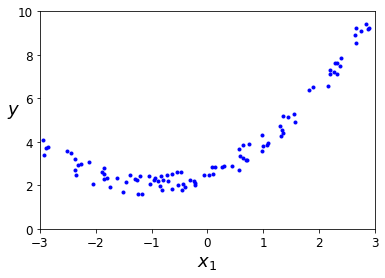

In [24]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-1.25058935]
[-1.25058935  1.56397372]


X_poly now contains the original features of X + square of this feature.

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.5217795]), array([[0.98968128, 0.50332905]]))

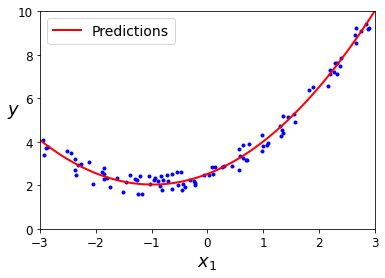

In [29]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## 2.1 Learning Curves

How can you tell that your model is overfitting or underfitting the data?

Besides using CV to get an estimate of model's generalization performance (if model performs well on training data but generalizes poorly according to cv metrics), naother way is look at learning curves.

Learning curves are plots of the model's performance on the training set and the validation set as a function of the training set size. To generate these plots, train the model several times on different sized subsets of the training set.

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

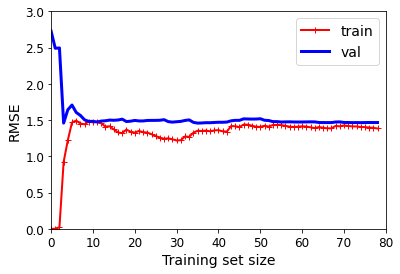

In [38]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()   

Both curves have reached a plateau and is an indication of underfitting. If model is underfitting the training data, adding more training examples will not help. We need more complex model or come up with better features

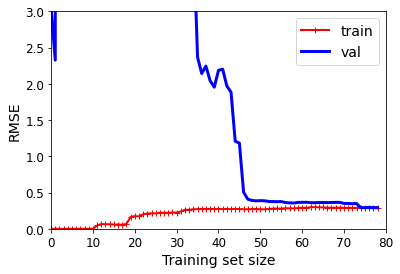

In [39]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()       

For this polynomial regression, the error on the training data is much lower than the linear regression model.
There is a gap between the curves. This means that the model performs significantly better on the training data than on validation, which is an indication of an overfitting model. If we used a much larger training set, the two curves would continue to get closer. One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

# 3. Bias Variance Tradeoff

A model's generalization error can be expressed as the sum of three different errors:   
- Bias: error due to wrong assumptions such as assuming data is linear when it is quadratic. High bias --> underfit
- Variance: due to model's excessive sensitivity to small variations in the training data. A model with many df likely to have high variance and thus overfit.
- Irreducible Error: due to noisiness of data. Only way to reduce this part of error is to clean up the data

# 4. Regularized Linear Models

A good way to reduce overfitting is to regularize the model (to constrain it). The fewer df, harder it will be for it to verfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees. FOr linear model, we constrain the weights of the model by adding penalties.

## 4.1 Ridge Regression

Ridge regression is also called Tikhonov regularization. A regularization term $\alpha \sum_{i=1}^n\theta_{i}^2$ is added to the cost function. This forces the learnin algorithm to not only fit the data but also keep the model weights as small as possible. The cost function is defined below:

$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^n \theta_{i}^2$

The bias term $\theta_{0}$ is not regularized. It is important to scale the data before performing Ridge Regression.

$\alpha$ hyperparameter controls how much you want to regularize the model.   
- $\alpha$ = 0: ridge regression is just linear regression
- $\alpha$ = large: all weights end up very close to zero and the result is a flat line going through the data's mean.

Increasing $\alpha$ --> increases bias but decreases variance

The closed-form solution of Ridge Regression is $\hat{\theta}$ = $(X^{T}X + \alpha A)^{-1} X^{T}y$

In [40]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.58567534]])

In [41]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.56151304])

## 4.2 LASSO Regression

LASSO: Least Absolute Shrinkage and Selection Operator Regression. The cost function is defined below:          
$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n |\theta_{i}|$

LASSO tends to eliminate the weights of the least important features (i.e sets them to zero). Thus, LASSO automatically performs feature selection and outputs a sparse model

LASSO cost function is not differentiable at $\theta_{i} = 0$ but GD works fine if we use a subgradient vector instead when any $\theta_{i} = 0$

In [42]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.53865297])

## 4.3 Elastic Net

Elastic Net is a middle ground between Ridge and LASSO Regression. The regulatization term is a mix of both Ridge and LASSO penalty. The cost function is given below:    
$J(\theta) = MSE(\theta) + r \alpha \sum_{i=1}^n |\theta_{i}| + \frac{1 - r}{2} \alpha \sum_{i=1}^n \theta_{i}^2$

Tips:    
- It is always preferable to have at least a little bit of regularization
- Ridge is good by default
- If suspect only a few features are useful, use LASSO.
- Elatic Net is preferred over LASSO because LASSO may behave erratically when number of m > n or when several features are strongly correlated.

In [43]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.53673583])

# 5. Early Stopping

For iterative learning algorithms such as Gradient Descent, we can use early stopping as a regularization technique. Early stopping means stoping the training as soon as the validation error reaches a minimum.

With SGD an Mini-batch GD, the curves are not so smooth and may be difficult to know whether we have reached the minimum. One solution is to stop only after the validation error has been above the minimum for some time, then we roll back the model parameters to the point where the validation error was at a minimum

In [56]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)


In [57]:
n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

In [58]:
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

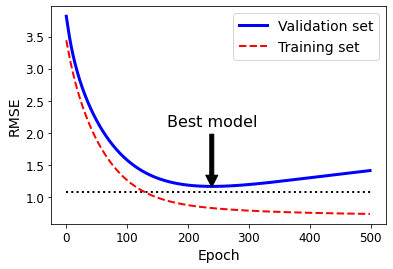

In [62]:
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )
best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [63]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [64]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))